In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [52]:
from sklearn.datasets import load_boston
boston = load_boston()

In [53]:
df = pd.DataFrame(boston['data'])
df.columns = (boston['feature_names'])
df['MEDV']=pd.DataFrame(boston['target'])

In [54]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [55]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [56]:
df.shape

(506, 14)

In [7]:
#importing Linear Regressor from sklearn
from sklearn.linear_model import LinearRegression

In [21]:
#to convert to numpy array
X1 = df['LSTAT'].values 
Y1 = df['MEDV'].values

In [9]:
#expected 2d array (and it was 1d array earlier) so reshaping using reshape
X=X1.reshape(-1,1)
Y=Y1.reshape(-1,1)

In [10]:
lr = LinearRegression().fit(X,Y)

In [11]:
print("LR Coefficient: {}".format(lr.coef_))
print("LR Intercept: {}".format(lr.intercept_))

LR Coefficient: [[-0.95004935]]
LR Intercept: [34.55384088]


In [12]:
Ypred = lr.predict(X)
Yres = Y-Ypred # for the Residuals ei
Yresdf = pd.DataFrame(Yres) #converting to DataFrame for Summary
print("Residuals: ")
Yresdf.describe()

Residuals: 


,0
count,5.060000e+02
mean,-8.288495e-15
std,6.209603e+00
min,-1.516745e+01
25%,-3.989612e+00
50%,-1.318186e+00
75%,2.033701e+00
max,2.450013e+01


In [13]:
#Statistics of Linear Regression
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [14]:
X1 = sm.add_constant(X)
model = sm.OLS(Y,X1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 28 Feb 2019   Prob (F-statistic):           5.08e-88
Time:                        23:41:25   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [15]:
#extracting Confidence Intervals from the Summary report
print(results.conf_int())
results.conf_int()[0][0]

[[33.44845704 35.65922472]
 [-1.0261482  -0.87395051]]


33.44845704042264

In [16]:
results.params

array([34.55384088, -0.95004935])

In [17]:
#Put values of LSTAT in C to get Predicted values and Confidence intervals
C = np.array([5,10,15])
Cfit = np.zeros((len(C),3))
for i,j in enumerate(C):
    Cfit[0][i]=j*results.params[1] + results.params[0]
for i,j in enumerate(C):
    Cfit[1][i]=(j*results.conf_int()[1][0]) + results.conf_int()[0][0]
for i,j in enumerate(C):
    Cfit[2][i]=(j*results.conf_int()[1][1]) + results.conf_int()[0][1]
predcidf = pd.DataFrame(Cfit.transpose(),columns=['fit','lwr','upr'])
predcidf

,fit,lwr,upr
0,29.803594,28.317716,31.289472
1,25.053347,23.186975,26.919720
2,20.303101,18.056234,22.549967


C:\Users\saswa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


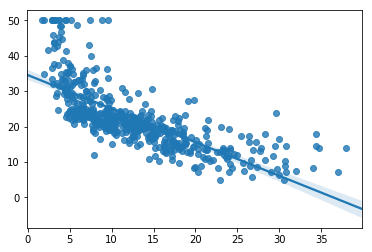

In [22]:
import seaborn as sns
sns.regplot(X1,Y1)


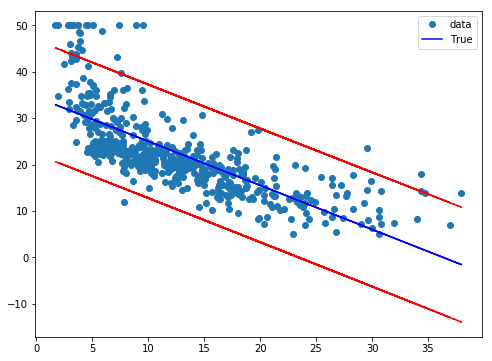

In [23]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X, Y, 'o', label="data")
ax.plot(X, results.fittedvalues, 'b-', label="True")
#ax.plot(X, res.fittedvalues, 'r--.', label="OLS")
ax.plot(X, iv_u, 'r--')
ax.plot(X, iv_l, 'r--')
ax.legend(loc='best');

RESIDUAL PLOT


Text(0.5,0,'LSTAT')

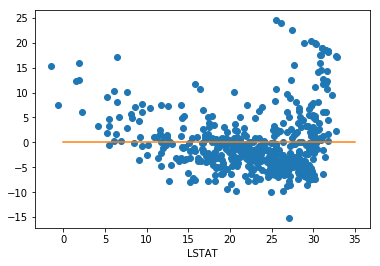

In [24]:
plt.plot(Ypred, Yres, 'o', label="data")
#plt.plot(X, Yres, 'o', label="data")
v = np.linspace(0,0,36)
plt.plot(v)
#plt.plot(X,Y,'x')
#plt.plot(X, results.fittedvalues, 'b-', label="True")
print("RESIDUAL PLOT")
plt.xlabel('LSTAT')

In [25]:
#Pair plots between variables for checking correlation
#sns.pairplot(df)

In [26]:
#Multiple Linear Regression
X2 = df[['LSTAT','AGE']]

X2.head()
X2np = np.array(X2)
X2np

array([[ 4.98, 65.2 ],
       [ 9.14, 78.9 ],
       [ 4.03, 61.1 ],
       ...,
       [ 5.64, 91.  ],
       [ 6.48, 89.3 ],
       [ 7.88, 80.8 ]])

In [27]:
mlr = LinearRegression().fit(X2,Y1)

In [28]:
print("LR Coefficient: {}".format(mlr.coef_))
print("LR Intercept: {}".format(mlr.intercept_))

LR Coefficient: [-1.03206856  0.03454434]
LR Intercept: 33.2227605317929


In [29]:
Ypredmlr = mlr.predict(X2)
Yresmlr = Y1-Ypredmlr # for the Residuals ei
Yresdfmlr = pd.DataFrame(Yresmlr) #converting to DataFrame for Summary
print("Residuals: ")
Yresdfmlr.describe()

Residuals: 


,0
count,5.060000e+02
mean,-5.634492e-15
std,6.160900e+00
min,-1.598124e+01
25%,-3.977470e+00
50%,-1.283443e+00
75%,1.968309e+00
max,2.315842e+01


In [30]:
X2sm = sm.add_constant(X2np)
modelmlr = sm.OLS(Y,X2sm)
resultsmlr = modelmlr.fit()
print(resultsmlr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 28 Feb 2019   Prob (F-statistic):           2.98e-88
Time:                        23:44:15   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.0

In [31]:
df1 = pd.DataFrame(boston['data'])
df1.columns = (boston['feature_names'])
Xall = np.array(df1)

In [32]:
Xallsm = sm.add_constant(Xall)
modelmlrall = sm.OLS(Y,Xallsm)
resultsmlrall = modelmlrall.fit()
print(resultsmlrall.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 28 Feb 2019   Prob (F-statistic):          6.95e-135
Time:                        23:44:18   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

In [33]:
#STUDY interaction between Age and LSTAT
lenofdf=len(X2['LSTAT'])
X3 = pd.DataFrame(X2)
X3['LSTAT*AGE'] = pd.DataFrame(np.zeros((lenofdf,1)))
for i in range(lenofdf):
    X3['LSTAT*AGE'][i] = X3['LSTAT'][i]*X3['AGE'][i]

In [34]:
mlrint = LinearRegression().fit(X3,Y1)

In [35]:
print("LR Coefficient: {}".format(mlrint.coef_))
print("LR Intercept: {}".format(mlrint.intercept_))

LR Coefficient: [-1.39211684e+00 -7.20859509e-04  4.15595185e-03]
LR Intercept: 36.088535934612906


In [36]:
Ypredint = mlrint.predict(X3)
Yresint = Y1-Ypredint # for the Residuals ei
Yresdfint = pd.DataFrame(Yresint) #converting to DataFrame for Summary
print("Residuals: ")
Yresdfint.describe()

Residuals: 


,0
count,5.060000e+02
mean,-6.821070e-15
std,6.130223e+00
min,-1.580652e+01
25%,-4.044681e+00
50%,-1.333163e+00
75%,2.084707e+00
max,2.755206e+01


In [37]:
X3np = np.array(X3)
X3sm = sm.add_constant(X3np)
modelmlrint = sm.OLS(Y1,X3sm)
resultsmlrint = modelmlrint.fit()
print(resultsmlrint.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 28 Feb 2019   Prob (F-statistic):           4.86e-88
Time:                        23:44:25   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0885      1.470     24.553      0.0

In [81]:
#NON-Linear Transformation of the Predictors
X4 = df['LSTAT']
X4 = pd.DataFrame(X4)
X4.columns = (['LSTAT'])
X4['LSTAT^2'] = pd.DataFrame(np.zeros((lenofdf,1)))
for i in range(lenofdf):
    X4['LSTAT^2'][i] = X4['LSTAT'][i]*X4['LSTAT'][i]
X4 = np.array(X4)
Y4 = np.array(Y1)

In [84]:
lrxx = LinearRegression().fit(X4,Y4)

In [86]:
print("LR Coefficient: {}".format(lrxx.coef_))
print("LR Intercept: {}".format(lrxx.intercept_))

LR Coefficient: [-2.3328211   0.04354689]
LR Intercept: 42.862007328169355


In [94]:
Ypredxx = lrxx.predict(X4)
Yresxx = Y4-Ypredxx # for the Residuals ei
Yresdfxx = pd.DataFrame(Yresxx) #converting to DataFrame for Summary
print("Residuals: ")
Yresdfxx.describe()

Residuals: 


,0
count,5.060000e+02
mean,-1.535180e-14
std,5.512765e+00
min,-1.528340e+01
25%,-3.831307e+00
50%,-5.295002e-01
75%,2.309535e+00
max,2.541481e+01


In [95]:
X4sm = sm.add_constant(X4)
modelmlrxx = sm.OLS(Y4,X4sm)
resultsmlrxx = modelmlrxx.fit()
print(resultsmlrxx.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 01 Mar 2019   Prob (F-statistic):          1.56e-112
Time:                        00:12:52   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.8620      0.872     49.149      0.0